In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import h5py
import numpy as np
import pandas as pd
import os
import cv2
from matplotlib import pyplot as plt
from google.colab import files
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ntpath
from tensorflow.keras import datasets, layers, models

TensorFlow 2.x selected.


Using TensorFlow backend.


In [3]:
# download training and testing images
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 5s 0us/step


In [0]:
#creating convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
#compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 13s 270us/sample - loss: 1.6576 - accuracy: 0.3871 - val_loss: 1.3791 - val_accuracy: 0.5031
Epoch 2/25
50000/50000 [==============================] - 7s 135us/sample - loss: 1.3063 - accuracy: 0.5349 - val_loss: 1.1198 - val_accuracy: 0.5996
Epoch 3/25
50000/50000 [==============================] - 7s 134us/sample - loss: 1.1651 - accuracy: 0.5886 - val_loss: 1.0468 - val_accuracy: 0.6328
Epoch 4/25
50000/50000 [==============================] - 7s 136us/sample - loss: 1.0708 - accuracy: 0.6213 - val_loss: 0.9755 - val_accuracy: 0.6579
Epoch 5/25
50000/50000 [==============================] - 7s 134us/sample - loss: 1.0127 - accuracy: 0.6443 - val_loss: 0.9893 - val_accuracy: 0.6487
Epoch 6/25
50000/50000 [==============================] - 7s 133us/sample - loss: 0.9633 - accuracy: 0.6601 - val_loss: 0.8974 - val_accuracy: 0.6923
Epoch 7/25
50000/50000 [=========================

In [6]:
#model.save("e15.h5")
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("predicted accuracy:",test_acc)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

10000/10000 - 1s - loss: 0.8883 - accuracy: 0.7172
predicted accuracy: 0.7172


In [7]:
# delete all current test images and creates the folder for them if needed
!rm testimages/*
!mkdir testimages

# select the images (png or jpg) to be tested here from your local machine
uploaded = files.upload()

# moves uploaded images to test folder
!mv *.jpg testimages
!mv *.jpeg testimages
!mv *.JPEG testimages
!mv *.jfif testimages
!mv *.png testimages

rm: cannot remove 'testimages/*': No such file or directory


Saving 1_C52aLJGV5PVqJwF_-RbgSg.jpeg to 1_C52aLJGV5PVqJwF_-RbgSg.jpeg
Saving 71PjyY+P7AL._CR180,0,1080,1080_UX256.jpg to 71PjyY+P7AL._CR180,0,1080,1080_UX256.jpg
Saving 78c9b524794a8b348b9f8a027b4fc855.jpg to 78c9b524794a8b348b9f8a027b4fc855.jpg
Saving 81iFkaQz9JL._CR0,204,1224,1224_UX256.jpg to 81iFkaQz9JL._CR0,204,1224,1224_UX256.jpg
Saving 81p7Dvzb1LL._CR204,0,1224,1224_UX256.jpg to 81p7Dvzb1LL._CR204,0,1224,1224_UX256.jpg
Saving 209bb8a0-30ab-46be-b38d-58c2feb93e4a_1.1a15fb5bcbecbadd4a45822a11bf6257.jpeg to 209bb8a0-30ab-46be-b38d-58c2feb93e4a_1.1a15fb5bcbecbadd4a45822a11bf6257.jpeg
Saving 9365ae07-1245-4af3-8e22-441e6ca66988_1.4322601454da467c0db34ca937825043.jpeg to 9365ae07-1245-4af3-8e22-441e6ca66988_1.4322601454da467c0db34ca937825043.jpeg
Saving 5596408_orig.png to 5596408_orig.png
Saving 20160630074019db90097aafa260c2a18f569e538fd637587fc91903a990d96c4c3e1b2467271177f6ec20-256.jpg to 20160630074019db90097aafa260c2a18f569e538fd637587fc91903a990d96c4c3e1b2467271177f6ec20-256.jp

softmax score: 0
file name: vehicle (1).jpeg
Not a vehicle


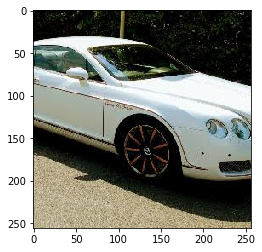

prediction was incorrect
**************************************************************
softmax score: 9
file name: vehicle (2).jpeg
This is a vehicle!


**************************************************************
softmax score: 1
file name: vehicle (3).jfif
This is a vehicle!


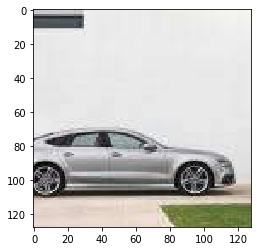

**************************************************************
softmax score: 7
file name: 71PjyY+P7AL._CR180,0,1080,1080_UX256.jpg
Not a vehicle


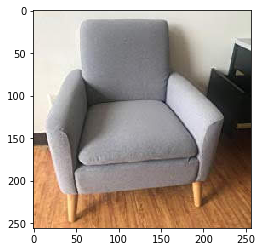

**************************************************************
softmax score: 9
file name: iother2.jfif
This is a vehicle!


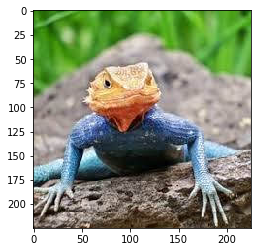

prediction was incorrect
**************************************************************
softmax score: 0
file name: xGK2A2804-256x256.jpg.pagespeed.ic.7ppq_mMxaz.jpg
Not a vehicle


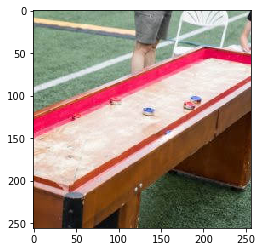

**************************************************************
softmax score: 8
file name: 81p7Dvzb1LL._CR204,0,1224,1224_UX256.jpg
Not a vehicle


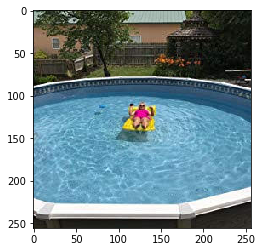

**************************************************************
softmax score: 9
file name: tree1.jpg
This is a vehicle!


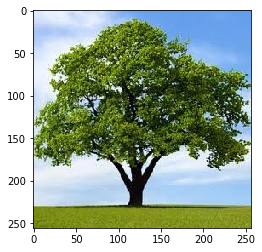

prediction was incorrect
**************************************************************
softmax score: 1
file name: icar1.jpeg
This is a vehicle!


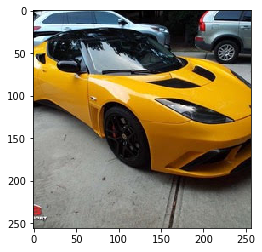

**************************************************************
softmax score: 1
file name: vehicle (7).jpg
This is a vehicle!


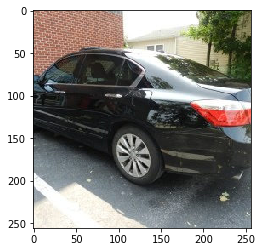

**************************************************************
softmax score: 0
file name: 209bb8a0-30ab-46be-b38d-58c2feb93e4a_1.1a15fb5bcbecbadd4a45822a11bf6257.jpeg
Not a vehicle


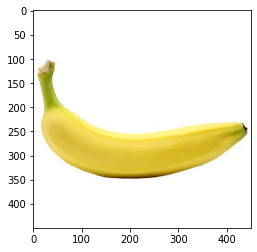

**************************************************************
softmax score: 1
file name: vehicle (6).jpg
This is a vehicle!


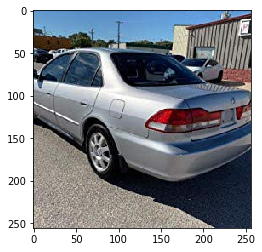

**************************************************************
softmax score: 0
file name: a461929d8e93f9df9e8d25c960767c9c.jpg
Not a vehicle


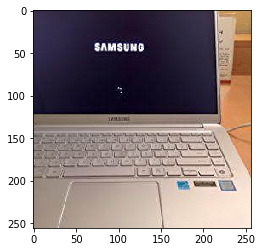

**************************************************************
softmax score: 0
file name: vehicle (4).jpeg
Not a vehicle


prediction was incorrect
**************************************************************
softmax score: 9
file name: vehicle (9).jpg
This is a vehicle!


**************************************************************
softmax score: 9
file name: vehicle (1).jpg
This is a vehicle!


**************************************************************
softmax score: 7
file name: 81iFkaQz9JL._CR0,204,1224,1224_UX256.jpg
Not a vehicle


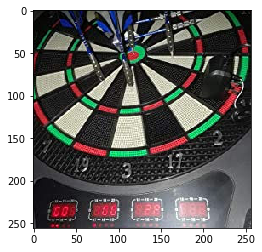

**************************************************************
softmax score: 9
file name: car2.jpg
This is a vehicle!


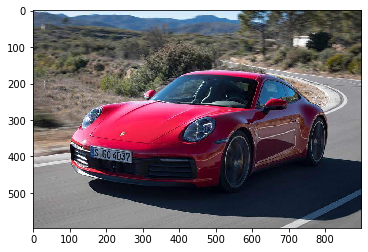

**************************************************************
softmax score: 1
file name: car22.jpg
This is a vehicle!


**************************************************************
softmax score: 1
file name: icar2.png
This is a vehicle!


**************************************************************
softmax score: 9
file name: IMG_0047_sm.jfif
This is a vehicle!


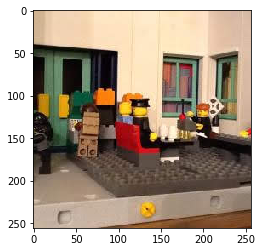

prediction was incorrect
**************************************************************
softmax score: 8
file name: 9365ae07-1245-4af3-8e22-441e6ca66988_1.4322601454da467c0db34ca937825043.jpeg
Not a vehicle


**************************************************************
softmax score: 9
file name: coffee.jpeg
This is a vehicle!


prediction was incorrect
**************************************************************
softmax score: 8
file name: img6.jpg
Not a vehicle


**************************************************************
softmax score: 9
file name: vehicle (3).jpeg
This is a vehicle!


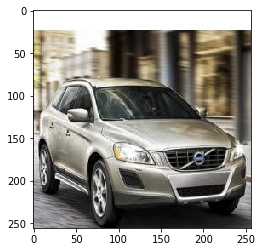

**************************************************************
softmax score: 0
file name: underwater-swimming.jpg
Not a vehicle


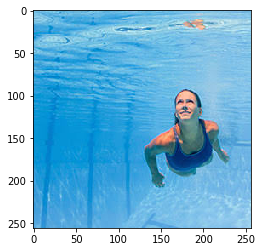

**************************************************************
softmax score: 7
file name: other3.jpg
Not a vehicle


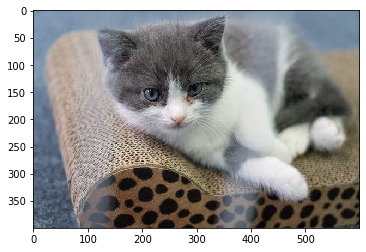

**************************************************************
softmax score: 9
file name: car4.jpg
This is a vehicle!


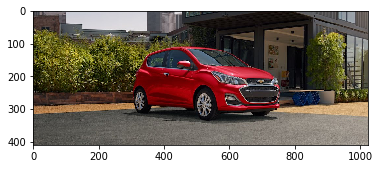

**************************************************************
softmax score: 1
file name: 1_C52aLJGV5PVqJwF_-RbgSg.jpeg
This is a vehicle!


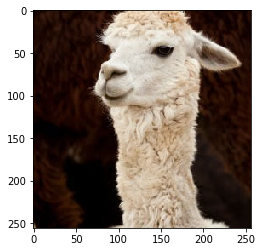

prediction was incorrect
**************************************************************
softmax score: 9
file name: car3.jpg
This is a vehicle!


**************************************************************
softmax score: 1
file name: vehicle (8).jpg
This is a vehicle!


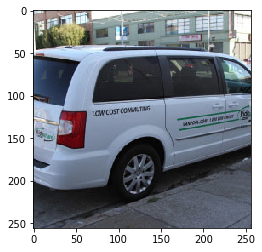

**************************************************************
softmax score: 1
file name: car1.jpg
This is a vehicle!


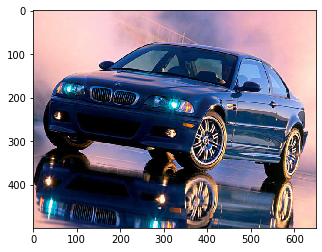

**************************************************************
softmax score: 0
file name: vehicle (10).jpg
Not a vehicle


prediction was incorrect
**************************************************************
softmax score: 1
file name: vehicle (3).jpg
This is a vehicle!


**************************************************************
softmax score: 1
file name: 5596408_orig.png
This is a vehicle!


prediction was incorrect
**************************************************************
softmax score: 0
file name: icar3.jpg
Not a vehicle


prediction was incorrect
**************************************************************
softmax score: 9
file name: vehicle (2).jpg
This is a vehicle!


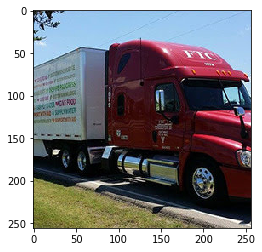

**************************************************************
softmax score: 9
file name: highres_281545174.jpeg
This is a vehicle!


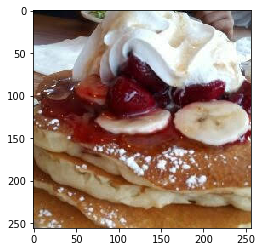

prediction was incorrect
**************************************************************
softmax score: 8
file name: e8d521e106ff63ee012d4ed35a713049_10.jfif
Not a vehicle


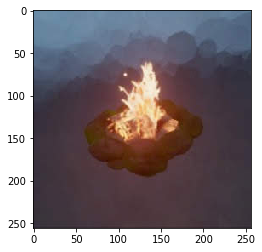

**************************************************************
softmax score: 0
file name: 20160630074019db90097aafa260c2a18f569e538fd637587fc91903a990d96c4c3e1b2467271177f6ec20-256.jpg
Not a vehicle


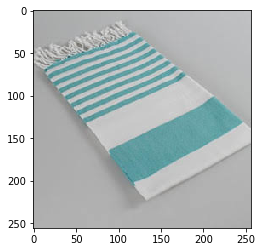

**************************************************************
softmax score: 1
file name: car5.jpg
This is a vehicle!


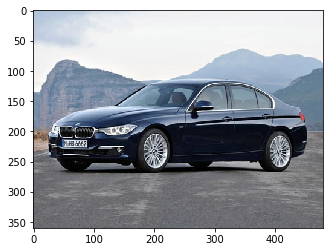

**************************************************************
softmax score: 9
file name: vehicle (4).jpg
This is a vehicle!


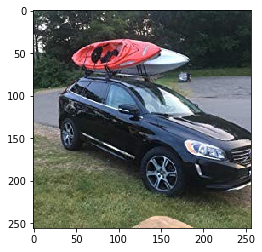

**************************************************************
softmax score: 0
file name: vehicle (5).jpg
Not a vehicle


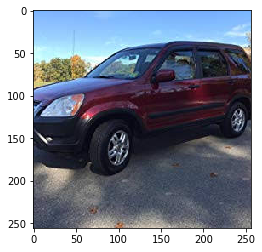

prediction was incorrect
**************************************************************
softmax score: 6
file name: 78c9b524794a8b348b9f8a027b4fc855.jpg
Not a vehicle


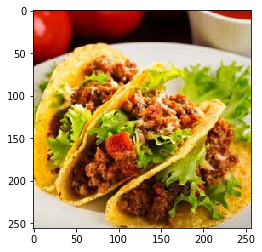

**************************************************************
softmax score: 0
file name: 21040563294295m.jfif
Not a vehicle


**************************************************************
softmax score: 0
file name: vehicle (1).jfif
Not a vehicle


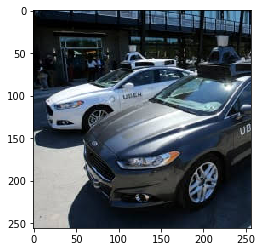

prediction was incorrect
**************************************************************
softmax score: 4
file name: kh.jfif
Not a vehicle


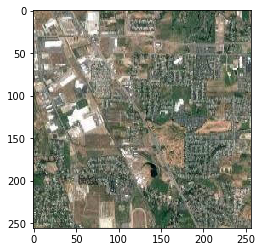

**************************************************************
softmax score: 7
file name: other5.jpg
Not a vehicle


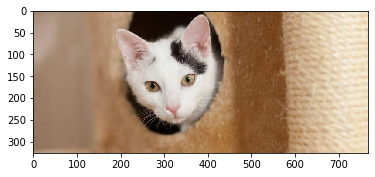

**************************************************************
softmax score: 7
file name: bottle.jpg
Not a vehicle


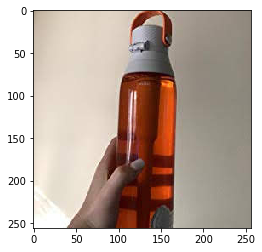

**************************************************************
softmax score: 7
file name: IMG_8786-256x256.jpg
Not a vehicle


**************************************************************
functional accuracy for your 50 images: 0.74 ; this assumes your files were named appropriately
predicted accuracy:  0.7172


In [8]:
# Test the input images against the model
folder_path = 'testimages'
correct = 0
counttotal = 0
namedFiles = 0
for img in os.listdir(folder_path):
  name = ntpath.basename(img)
  img = os.path.join(folder_path, img)
  showimg=mpimg.imread(img)
  imgplot = plt.imshow(showimg)
  img = image.load_img(img, target_size=(32, 32))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  ct = model.predict_classes(img)
  
  # prints if the agent thinks the picture is a vehicle or not
  print("softmax score:", ct[0])
  print("file name:", name)
  if (ct[0] > 0 and ct[0] <2) or (ct[0] < 10 and ct[0] > 8):
    print("This is a vehicle!")
    iscar = True
  else: 
    print("Not a vehicle")
    iscar = False
  plt.show()

##### checks if the prediction was correct if the imported files have 'car' or 'vehicle' in the name
  if (name.find("car") > -1) or (name.find("vehicle")) > -1: 
    cname = True
    namedFiles += 1
  else: cname = False
  if (cname and iscar) or (not cname and not iscar):
    correct += 1 
    # for testing purposes of named files for functional accuracy
    #print("prediction was correct")
  else: print("prediction was incorrect")
  counttotal += 1
#####
  print("**************************************************************")

if counttotal == 0: print("please import some pictures to test")
elif namedFiles/counttotal > .35: 
  #if the files are named incorrectly the functional accuracy number will be inaccurate
  #please use the provided 'test images' folder for functional accuracy
  print("functional accuracy for your", counttotal, "images:", correct/counttotal, "; this assumes your files were named appropriately")
else: print("Use named files for an automatically calculated functional accuracy")
print("predicted accuracy: ", test_acc)
